# Master equation approach to constitutive gene expression

This exercise was generated from a Jupyter notebook. You can download the notebook [here](gene_expression_master_equation_approach.ipynb).

In this tutorial we will extend the treatment of gene expression presented in [Exercise 5](constitutive_expression.html) to account for the stochastic effects. When the mean number of mRNAs is very large, the stochastic effects are insignificant. However, when the average number of mRNAs is small, the stochastic effects become essential and much can be learned about the gene expression mechanism from the distribution of mRNA counts.

The master equation that describes the stochastic dynamics of mRNA counts is

\begin{align}
p(m, t+ \Delta t) = p(m, t) + r \Delta t \, p(m-1, t) + \gamma (m+1) \Delta t \, p(m+1, t) - r \Delta t \, p(m,t) - \gamma m \Delta t \, p(m,t),
\end{align}

where $p(m,t)$ is the probability that the cell has $m$ mRNAs at time $t$, $r$ is the rate of constitutive expression, $\gamma$ is the mRNA degradation rate and $\Delta t$ is the time increment that we'll use in numerical estimation.

Like in [the case of diffusion](diffusion_1d_and_FRAP.html), here too we need to specify the boundary conditions for the master equation, namely

\begin{align}
p(0, t+ \Delta t) &= p(0, t) +  \gamma \Delta t \, p(1, t) - r \Delta t \, p(0,t), \\
p(M, t+ \Delta t) &= p(M, t) + r \Delta t \, p(M-1, t) - \gamma M \Delta t \, p(M,t),
\end{align}

where $M$ is the largest number of mRNAs that the cell can have. In practice, choosing a value for $M$ that is several times larger than the mean number of mRNAs will be sufficient to ensure accurate estimates.

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import pboc_utilities as pboc

We begin by assigning numerical values to the parameters of the model and initialize the distribution to have one mRNA at $t=0$. For our choice of parameters, the average number of mRNAs should be $r/\gamma = 5$.

In [11]:
# Time increment in minutes
dt = 0.1

# mRNA production rate in min^-1
r = 0.5

# Degradation rate in min^-1
gamma = 0.1

# Cap (-1) on the number of mRNAs
M = 20

# Number of steps
n_steps = 300

# Array to store mRNA probabilities
mRNA = np.zeros([M, n_steps])

# Initialization
mRNA[0,0] = 1

We then follow the standard numerical integration procedure to obtain the distribution of mRNA counts at different points in time.

In [12]:
# Spread the butter
for t in range(n_steps-1):
    
    # Interior of the distribution
    for m in range(1, M-1):
        mRNA[m, t+1] = mRNA[m,t] + r*dt*mRNA[m-1,t] + gamma*(m+1)*dt*mRNA[m+1,t] \
                       - r*dt*mRNA[m,t] - gamma*m*dt*mRNA[m,t]
    
    # Left boundary
    mRNA[0,t+1] = mRNA[0,t] + gamma*dt*mRNA[1,t] - r*dt*mRNA[0,t]
    
    # Right boundary
    mRNA[-1, t+1] = mRNA[-1, t] + r*dt*mRNA[-2,t]-gamma*(M-1)*dt*mRNA[-1,t]

Finally, we use the utility function `bar_plot` to display the probability distribution at different instances.

(<matplotlib.figure.Figure at 0x119819358>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x1197429b0>)

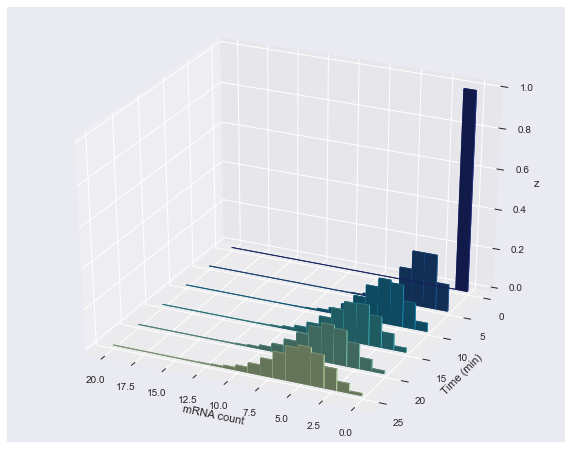

In [13]:
pboc.bar_plot(mRNA, n_slices=6, dy=dt, x_label='mRNA count', y_label='Time (min)')

As we can see, the distribution of mRNA counts converges into a Poisson distribution after roughly $20$ minutes.